# Libraries & Data Loading

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import cdt
import networkx as nx

In [67]:
dataset_dir = "datasets"

breast_cancer_df = pd.read_csv(f"{dataset_dir}/breast_cancer.csv")
thyroid_df = pd.read_csv(f"{dataset_dir}/thyroid.csv")

## Breast cancer dataset preprocessing

In [68]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
# Convert column "diagnosis" from categorical to binary
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "M", 'diagnosis'] = 1
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "B", 'diagnosis'] = 0

# Drop colum "Unnamed: 32" (contains only nan values)
breast_cancer_df.drop(columns=["Unnamed: 32", 'id'], inplace=True)

In [70]:
scaler = StandardScaler()
breast_cancer_df = pd.DataFrame(scaler.fit_transform(breast_cancer_df.to_numpy()), columns=breast_cancer_df.columns)

In [71]:
breast_cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.297676,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.297676,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1.297676,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.297676,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## Thyroid dataset preprocessing

In [101]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [102]:
# Binarize textual data
thyroid_df.replace({'F': 0., 'f': 0., 'M': 1., 't': 1., "P": 1., "N": 0.}, inplace=True)

# Categorical encoding for "referreal source" column
thyroid_df.replace({'SVHC': 0, 'SVI': 1, 'STMW': 2, 'SVHD': 3, 'other': -1}, inplace=True)

# "?" values have to removed. They cannot be mapped to np.nan because the algorithm won't work. I decided to map those values to 0, but we should discuss this choice
thyroid_df.replace({'?': 0.}, inplace=True)

In [103]:
# There are no measurements for TBG, can be dropped
thyroid_df.drop(columns=["TBG", "TBG measured"], inplace=True)

In [104]:
scaler = StandardScaler()
thyroid_df = pd.DataFrame(scaler.fit_transform(thyroid_df.to_numpy()), columns=thyroid_df.columns)

In [105]:
thyroid_df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,binaryClass
0,-0.533513,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.506041,0.817848,0.255413,0.539971,0.338124,0.697672,0.337150,0.213911,0.216665,0.289131
1,-1.429156,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.506041,0.361965,0.255413,0.007277,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753,0.289131
2,-0.284723,1.517556,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-1.976125,-1.461567,0.255413,0.169402,0.338124,0.048242,0.337150,0.453874,-0.772753,0.289131
3,0.909468,-0.658954,2.670077,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.506041,0.270789,0.255413,1.698002,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753,0.289131
4,0.909468,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.506041,-0.367448,0.255413,-0.942308,0.338124,-0.064702,0.337150,-0.636868,1.206082,0.289131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,-1.080850,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-1.976125,-1.461567,-3.915227,-2.355105,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753,0.289131
3768,0.809952,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.506041,0.453142,0.255413,0.516811,0.338124,0.528256,0.337150,0.322985,1.206082,0.289131
3769,1.108500,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.506041,0.179612,0.255413,0.238883,0.338124,0.500020,0.337150,0.126652,-0.772753,0.289131
3770,1.008984,1.517556,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.506041,0.361965,0.255413,-0.455935,0.338124,0.132951,0.337150,-0.266016,1.206082,0.289131


# Independence graphs

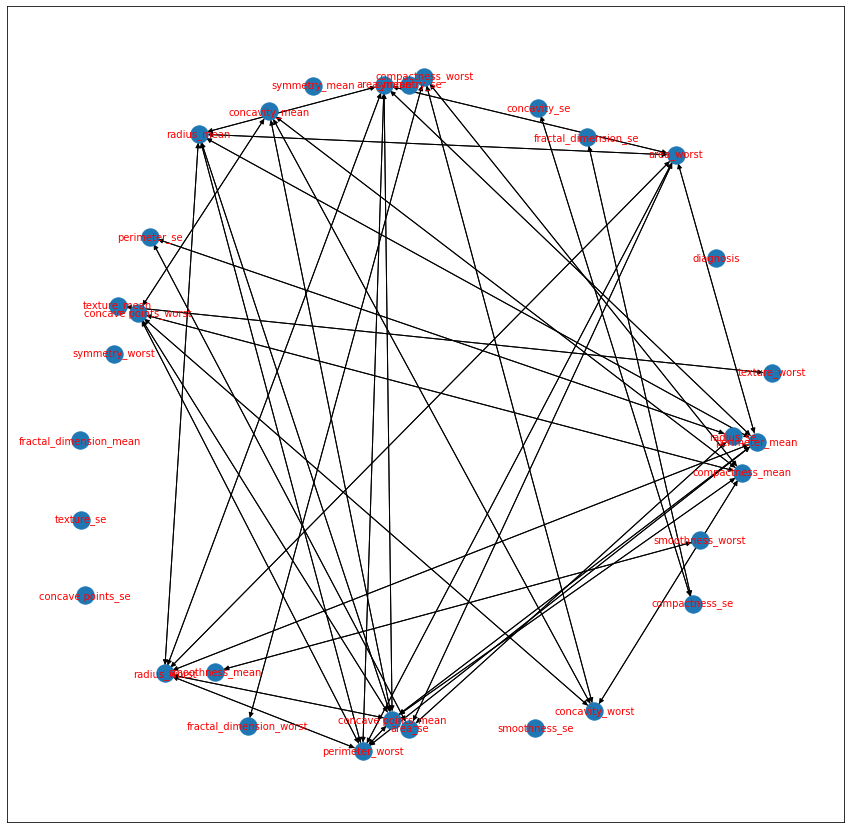

In [93]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_bc = glasso.predict(breast_cancer_df, 0.8)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_bc, font_size=10, font_color='r')

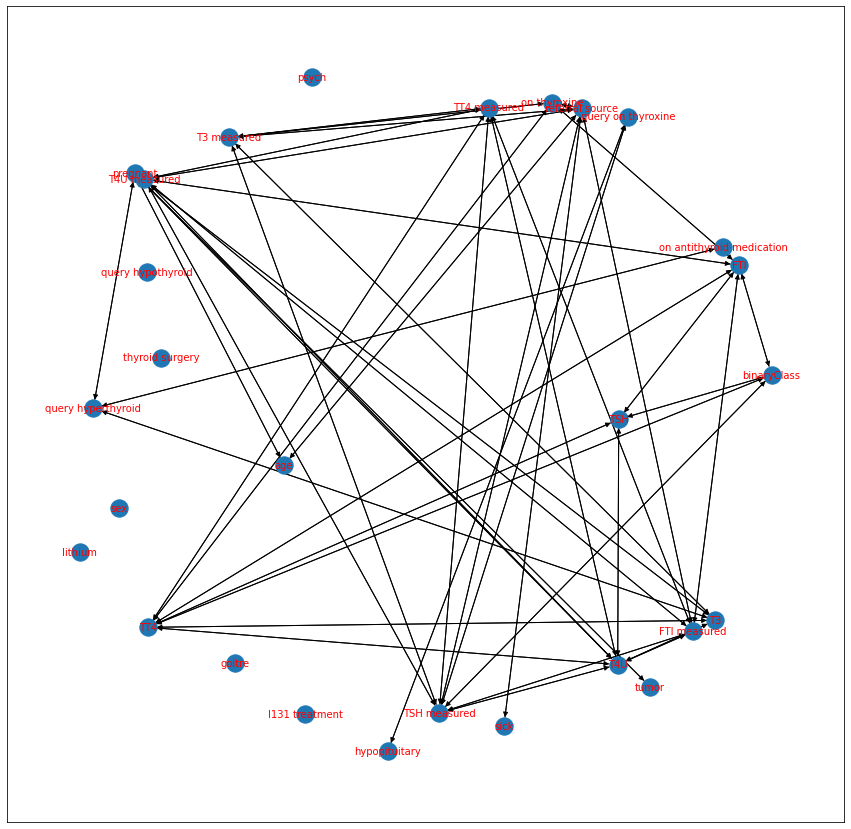

In [108]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_t = glasso.predict(thyroid_df, 0.1)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_t, font_size=10, font_color='r')

# PC

PC is ran on the skeleton of the given graph.


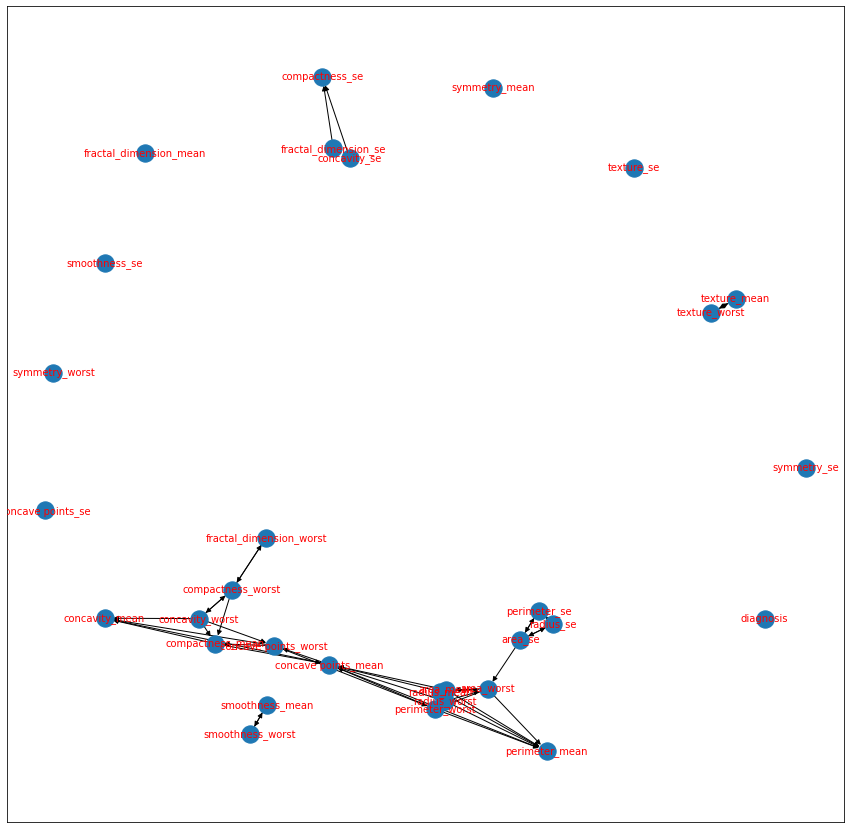

In [95]:
model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc, font_size=10, font_color='r')

PC is ran on the skeleton of the given graph.


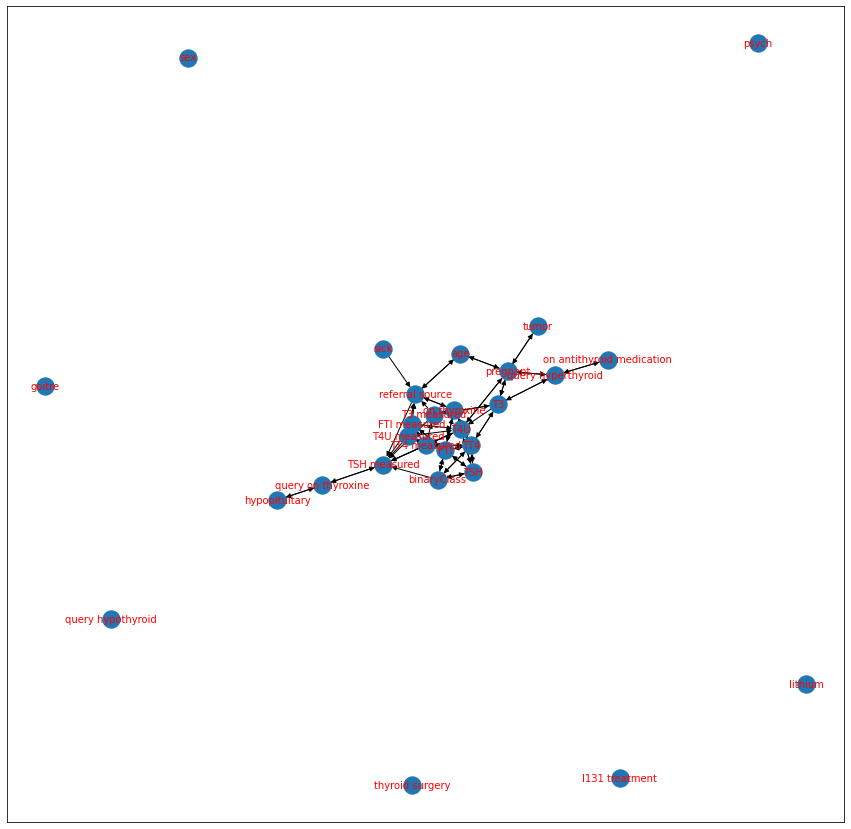

In [109]:
model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(thyroid_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc, font_size=10, font_color='r')

# GES

GES is ran on the skeleton of the given graph.


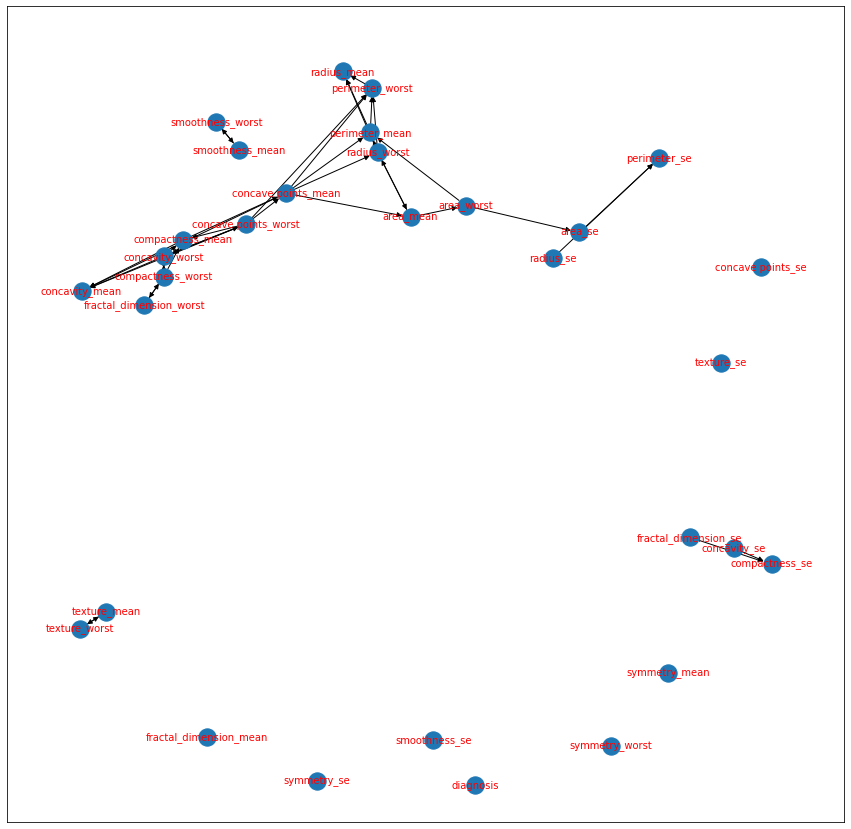

In [99]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges = model_ges.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges, font_size=10, font_color='r')

GES is ran on the skeleton of the given graph.


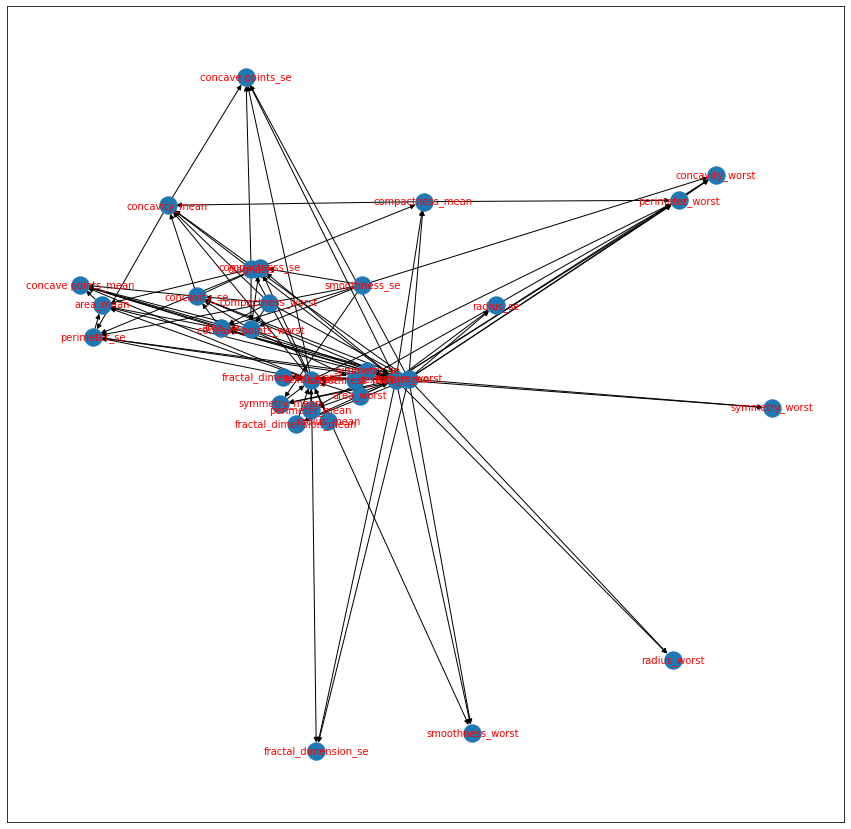

In [110]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges = model_ges.predict(breast_cancer_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges, font_size=10, font_color='r')

# LiNGAM

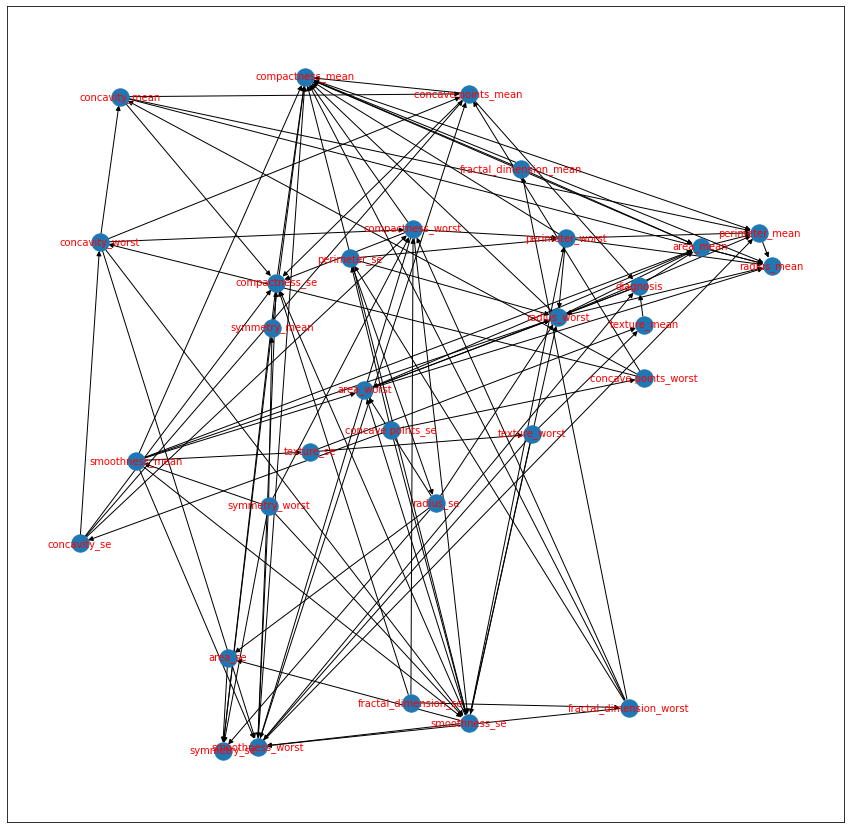

In [100]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

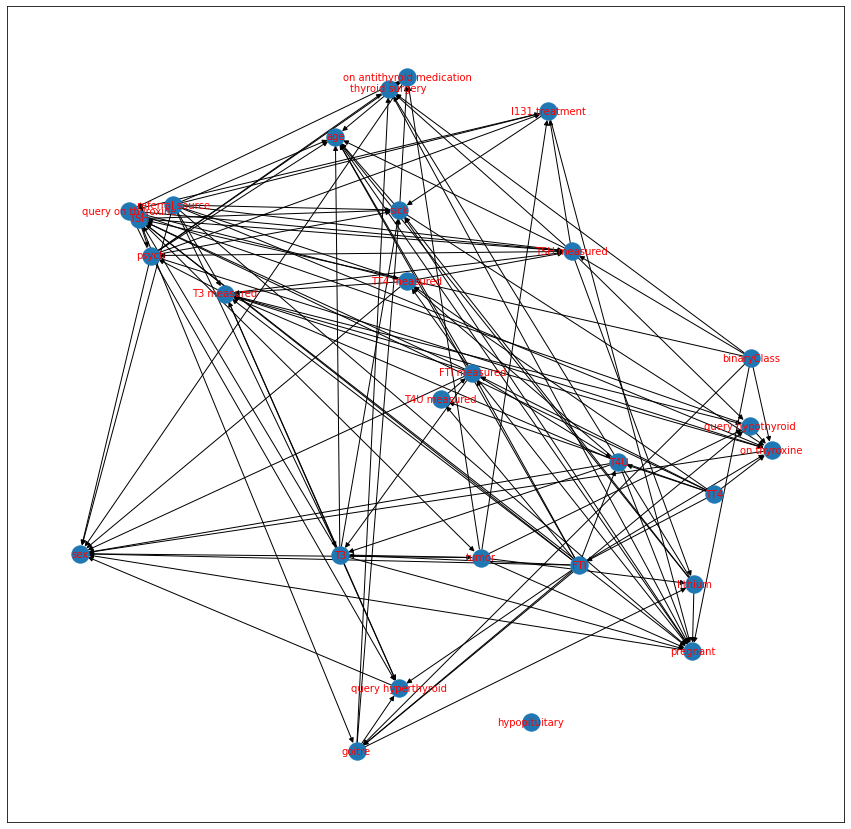

In [111]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')